In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Load data
train = pd.read_csv('train_set.csv')

D:\APP\CONDA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train.head().append(train.tail())

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last row in the train set needs to be removed.

In [4]:
train.drop(train.index[-1], inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

It seems that we have null values in lead_time

D:\APP\CONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


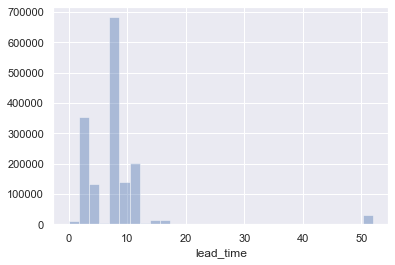

In [6]:
sns.distplot(train.lead_time.dropna(), bins=30, kde=False); 

In [7]:
# Replace missing values with median
train.lead_time.fillna(value=train.lead_time.median(), inplace=True)

In [8]:
# Transform dtypes to reduce memory use
for col, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[col] = train[col].astype(np.float32)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float32
 2   lead_time          1687860 non-null  float32
 3   in_transit_qty     1687860 non-null  float32
 4   forecast_3_month   1687860 non-null  float32
 5   forecast_6_month   1687860 non-null  float32
 6   forecast_9_month   1687860 non-null  float32
 7   sales_1_month      1687860 non-null  float32
 8   sales_3_month      1687860 non-null  float32
 9   sales_6_month      1687860 non-null  float32
 10  sales_9_month      1687860 non-null  float32
 11  min_bank           1687860 non-null  float32
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float32
 14  perf_6_month_avg   1687860 non-null  float32
 15  perf_12_month_avg  1687860 non-n

In [9]:
print(train.sku.nunique())

1687860


After examining the SKUs in both datasets, it is clear that there are no duplicate values as all skus numbers are unique. Thus, SKU column has no predicting value and we can simply drop it.

In [10]:
# Drop column 'sku'
train.drop(columns='sku', inplace=True)

In [11]:
# Now, let's take a look at the object dtypes features
train.select_dtypes(include = ['object']).head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No


In [12]:
train.select_dtypes(include = ['object']).columns

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [13]:
# Transform the categorical data using LableEncoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = train.select_dtypes(include = ['object']).columns

for col in cat_cols:
    train[col] = le.fit_transform(train[col])

In [14]:
train[cat_cols].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [15]:
# Rename the target column to 'stockout'
train.rename(columns={'went_on_backorder': 'stockout'}, inplace=True)

In [16]:
train[['perf_6_month_avg', 'perf_12_month_avg']].head(10)

,perf_6_month_avg,perf_12_month_avg
0,-99.00,-99.00
1,0.99,0.99
2,-99.00,-99.00
3,0.10,0.13
4,-99.00,-99.00
5,0.82,0.87
6,-99.00,-99.00
7,0.00,0.00
8,-99.00,-99.00
9,0.82,0.87


Having a closer look a the data, we found that there are many -99 values in the 'perf_6_month_avg' and 'perf_12_month_avg' features. It is supposed that these are typos, which should be 0.99 instead as most values are ranging from (0, 1). We will correct these errors.

In [17]:
# Replace value -99 with 0.99
#train.loc[train.perf_6_month_avg == -99, 'perf_6_month_avg'] = 0.99

# Or, simply use Replace() method
train.replace(-99, 0.99, inplace=True)

In [18]:
train[['perf_6_month_avg', 'perf_12_month_avg']].head(10)

,perf_6_month_avg,perf_12_month_avg
0,0.99,0.99
1,0.99,0.99
2,0.99,0.99
3,0.10,0.13
4,0.99,0.99
5,0.82,0.87
6,0.99,0.99
7,0.00,0.00
8,0.99,0.99
9,0.82,0.87


In [19]:
# # Check distribution of float32 features
train.select_dtypes(include = ['float32']).describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.939953e+02,7.879902e+00,4.403553e+01,1.779904e+02,3.446567e+02,5.057592e+02,5.582733e+01,1.746590e+02,3.409689e+02,5.239893e+02,5.261286e+01,2.043724e+00,8.023943e-01,7.934197e-01,6.264507e-01
std,2.960954e+04,6.838310e+00,1.341975e+03,5.023383e+03,9.789125e+03,1.436995e+04,1.927306e+03,5.189427e+03,9.607190e+03,1.482941e+04,1.253923e+03,2.360052e+02,2.346696e-01,2.287684e-01,3.371606e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e-01,7.200000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.700000e-01,8.500000e-01,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.800000e-01,9.700000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


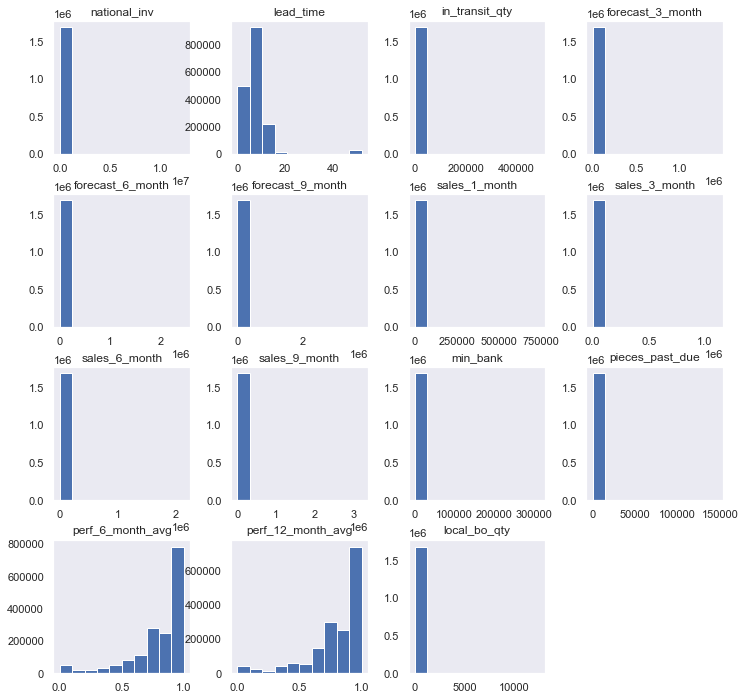

In [20]:
# Plot distribution histogram
train.select_dtypes(include = ['float32']).hist(figsize=(12,12), grid=False);

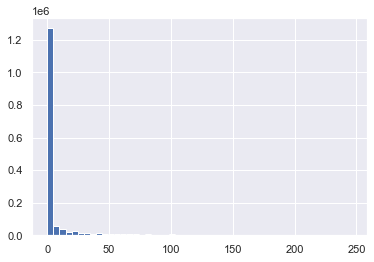

In [21]:
# Take a closer look at an example by specifying a shorter range
train.forecast_3_month.hist(bins=50, range=[train.forecast_3_month.min(), 
            train.forecast_6_month.max()/10000]);

In this tutorial, we will apply **RobustScaler** to transform our data, the detailed documentation can be found below:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [22]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()

def transformer (df):
    data = df.select_dtypes(include = ['float32'])
    data= rscaler.fit_transform(data)
    data = pd.DataFrame(data, columns=df.select_dtypes(
                        include = ['float32']).columns)
    df = data.join(df.select_dtypes(exclude = ['float32']))
    
    return df

train = transformer(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float32
 1   lead_time          1687860 non-null  float32
 2   in_transit_qty     1687860 non-null  float32
 3   forecast_3_month   1687860 non-null  float32
 4   forecast_6_month   1687860 non-null  float32
 5   forecast_9_month   1687860 non-null  float32
 6   sales_1_month      1687860 non-null  float32
 7   sales_3_month      1687860 non-null  float32
 8   sales_6_month      1687860 non-null  float32
 9   sales_9_month      1687860 non-null  float32
 10  min_bank           1687860 non-null  float32
 11  pieces_past_due    1687860 non-null  float32
 12  perf_6_month_avg   1687860 non-null  float32
 13  perf_12_month_avg  1687860 non-null  float32
 14  local_bo_qty       1687860 non-null  float32
 15  potential_issue    1687860 non-n

In [23]:
train.stockout.value_counts()

0    1676567
1      11293
Name: stockout, dtype: int64

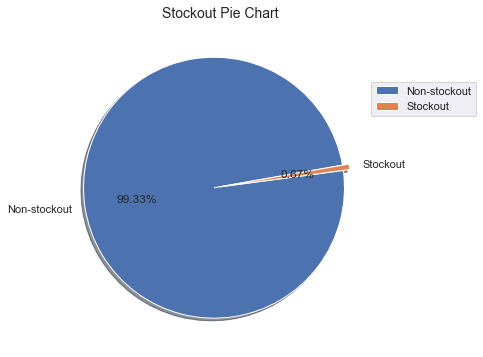

In [24]:
fig, axes = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
labels = 'Non-stockout', 'Stockout'
explode = (0.05, 0)

axes.pie(train.stockout.value_counts(), explode=explode, 
       labels=labels, autopct='%1.2f%%', shadow=True, startangle=10)
axes.set_title('Stockout Pie Chart', fontsize=14)

plt.legend(loc=4,bbox_to_anchor=(1.3, 0.7)); # locating legends

As can be seen from the above pie charts, non-stockout and stockout are imbalanced in the train dataset.

Let's train a binary classifier first and see how the restuls look like.

In [25]:
# Prepare data for training
from sklearn.model_selection import StratifiedShuffleSplit

# Use stratified split
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, 
                             random_state=42)
X, y = train.drop(columns='stockout',axis=1), train.stockout

for train_index, valid_index in sss.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

## Logistic Regression Classification

In [26]:
from sklearn.linear_model import LogisticRegression

# Train model
lr = LogisticRegression(C=0.5, max_iter=5000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=5000, random_state=42)

In [27]:
y_pred = lr.predict(X_valid)
print(lr.score(X_valid, y_valid))

0.9932932826182266


99.33% accuracy! Wow! 
However, remember that our samples are imbalanced, with over 99.33% of data are non-stockout. 
Even if you predict all the samples are non-stockout, you only have less than 1% error, and 99% accuracy.

We should use different performance measures instead.

## Classification Performance Measures

### Confusion Matrix

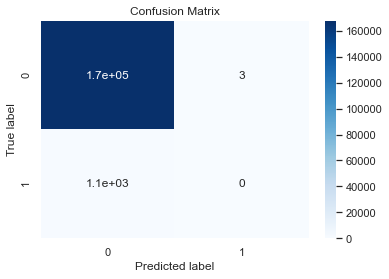

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set(title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label');

Not so great as we have predicted true stockout incorrectly, i.e. 0!

### Precision_Recall Curve

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define a PR curve function for later use
def plot_pr_curve (y_true, y_score, label='', linestyle = ''):
    p, r, threshold = precision_recall_curve(y_true, y_score)
    avg_p = average_precision_score(y_true, y_score, average='micro')
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(r, p, linewidth=1, linestyle = linestyle, 
            label='%s (precision = %.3f)'%(label,avg_p))
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc=1)
    ax.grid(True)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Precision-Recall Curve',fontsize=15)

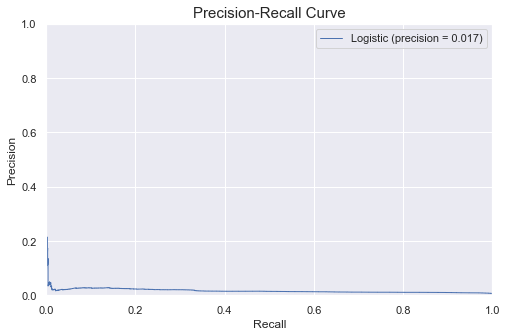

In [30]:
plot_pr_curve(y_valid, lr.decision_function(X_valid), 
              label='Logistic', linestyle='-')

No good either!

### ROC Curve (Receiver Operating Characteristic)

In [31]:
from sklearn.metrics import roc_curve,auc

# Let's define a ROC plot function for later use
def plot_roc_curve (y_true, y_score, label='', linestyle=''):
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(fpr, tpr, linewidth=2, linestyle=linestyle, 
            label = '%s AUC = %0.3f' % (label, roc_auc))
    
    ax.plot([0,1],[0,1],color='k',linewidth=0.5,linestyle='--')    
    ax.legend(loc=4)    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.1])
    ax.set_title('ROC Curve', fontsize=15);

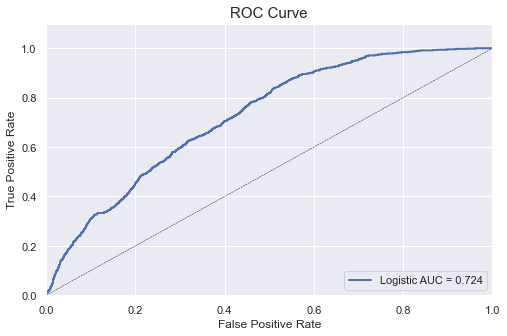

In [32]:
plot_roc_curve(y_valid, lr.decision_function(X_valid), 
               label='Logistic', linestyle='-')

AUC score 0.724 isn't good enough.

After examining the Confusion Matrix, Precision/Recall curve and ROC curve, we can see that alghough the trained model has a very high accuracy score, it doesn't performed very well. The high accuracy score is due to imbalanced sample distribution.

## Imbalanced Learning

Imbalanced dataset is quite common in real life, most ML algorithms are accuracy driven and favour the majority classes.

To deal with it you can do the followings:

 - Collect more data if you can to achieve a more balanced sample.
 - Use other performance measures than accuracy.(e.g. confusion matrix,PR,ROC)
 - Resample the dataset (undersampling/oversampling)
 - Synthetic sampling (e.g. SMOTE - Synthetic Minority Over-sampling Technique)
 
**Imbalanced learn API**:

Installation - https://imbalanced-learn.org/stable/install.html

Documentation - https://imbalanced-learn.org/stable/user_guide.html

In this tutorial, we will apply combined over- and undersampling method **SMOTETomek**

In [33]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

""" Warning: the following model can take very long time to train """

# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# # Save the new samples to file for quick re-use later on  
# pd.DataFrame(X_train_resampled, columns=X_train.columns).\
#                                 to_csv('X_train_resampled.csv',index=False)
# pd.DataFrame(y_train_resampled).to_csv('y_train_resampled.csv',index=False)

In [33]:
# Load the new samples
X_train_new = pd.read_csv('X_train_resampled.csv')
y_train_new = pd.read_csv('y_train_resampled.csv')

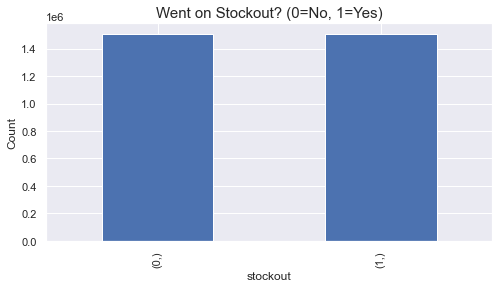

In [34]:
# Plot resampled y_train data distribution
plt.figure(figsize=(8, 4))
y_train_new.value_counts().sort_index().plot(kind='bar')
plt.ylabel("Count")
plt.title('Went on Stockout? (0=No, 1=Yes)', fontsize=15);

In [35]:
# Flatten the target data for training purpose
y_train_new = y_train_new.values.ravel()

In [36]:
# Train the logistic regression model with new data
lr.fit(X_train_new, y_train_new)

LogisticRegression(C=0.5, max_iter=5000, random_state=42)

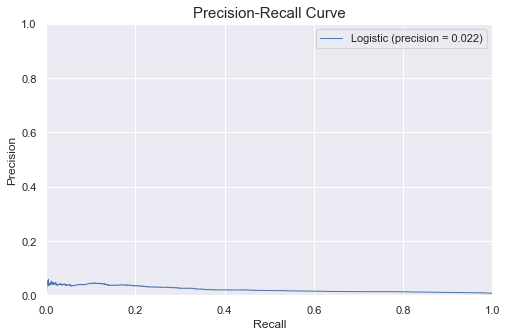

In [37]:
plot_pr_curve(y_valid, lr.decision_function(X_valid), 
              label='Logistic', linestyle='-')

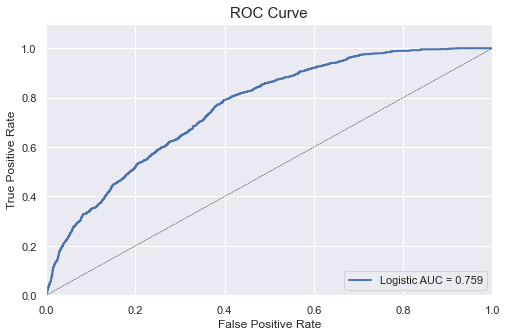

In [38]:
plot_roc_curve(y_valid, lr.decision_function(X_valid), 
               label='Logistic', linestyle='-')

Training on the balanced sample with the same Logistic Regression model returns slightly better results. 

We will try training other ML models.

## Support Vector Classification

In [39]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=10,max_iter=5000,dual=False,random_state=42)
lsvc.fit(X_train_new, y_train_new)

LinearSVC(C=100, dual=False, max_iter=5000, random_state=42)

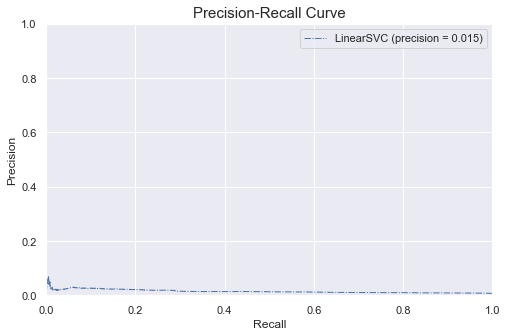

In [42]:
plot_pr_curve(y_valid, lsvc.decision_function(X_valid), 
              label='LinearSVC', linestyle='-.')

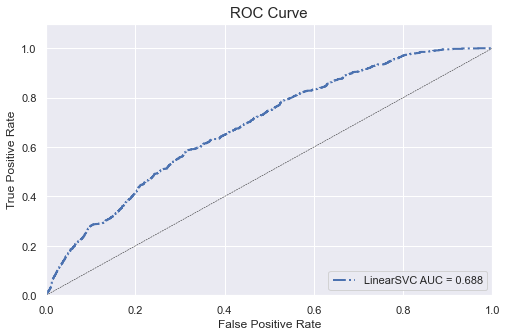

In [43]:
plot_roc_curve(y_valid, lsvc.decision_function(X_valid), 
               label='LinearSVC', linestyle='-.')

## Random Forest Classification

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, 
                             random_state=42)
rfc.fit(X_train_new, y_train_new)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

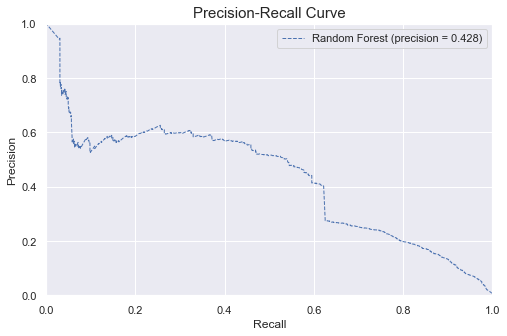

In [46]:
plot_pr_curve(y_valid, rfc.predict_proba(X_valid)[:,1], 
              label='Random Forest', linestyle='--')

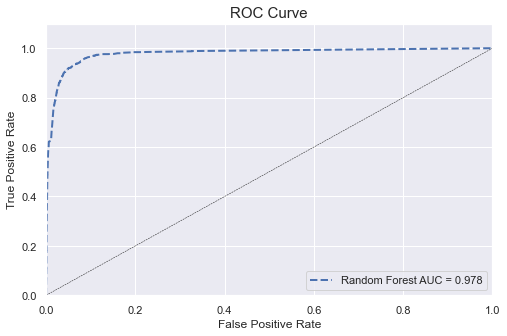

In [47]:
plot_roc_curve(y_valid, rfc.predict_proba(X_valid)[:,1], 
               label='Random Forest',linestyle='--')

## Boosting Methods for Classification

### AdaBoost (Adaptive Boosting)

In [48]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, learning_rate=1,
                         random_state=42)  

abc.fit(X_train_new, y_train_new)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

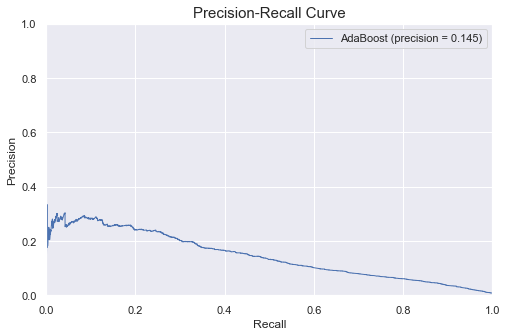

In [49]:
plot_pr_curve(y_valid, abc.decision_function(X_valid), 
              label='AdaBoost', linestyle='-')

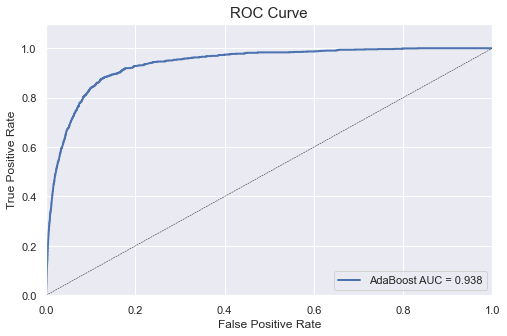

In [50]:
plot_roc_curve(y_valid, abc.decision_function(X_valid), 
               label='AdaBoost', linestyle='-')

### Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, 
                                 learning_rate=0.1, random_state=42)

gbc.fit(X_train_new, y_train_new)

GradientBoostingClassifier(n_estimators=500, random_state=42)

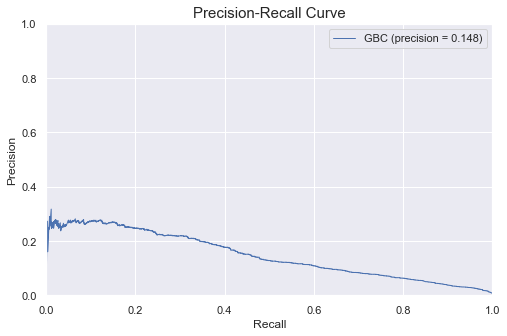

In [52]:
plot_pr_curve(y_valid, gbc.decision_function(X_valid),
              label='GBC', linestyle='-')

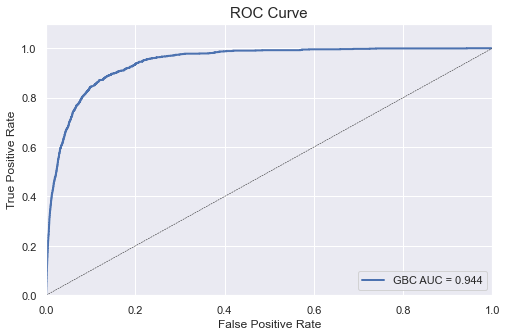

In [53]:
plot_roc_curve(y_valid, gbc.decision_function(X_valid),
               label='GBC', linestyle='-')

### EXTRA: XGBoost (Extreme Gradient Boosting)

In [54]:
from xgboost import XGBClassifier

# we just keep everything as default
xgbc = XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42) 

xgbc.fit(X_train_new, y_train_new)

D:\APP\CONDA\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

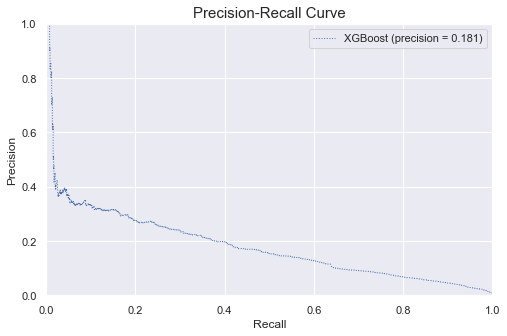

In [55]:
plot_pr_curve(y_valid, xgbc.predict_proba(X_valid)[:,1], label='XGBoost', linestyle=':')

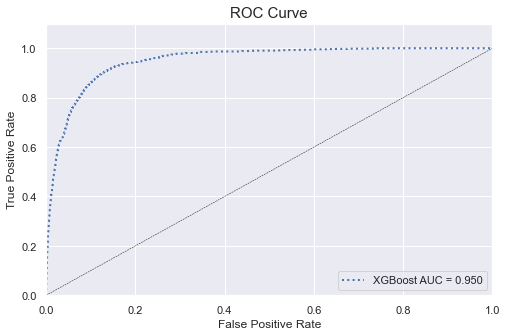

In [56]:
plot_roc_curve(y_valid, xgbc.predict_proba(X_valid)[:,1], label='XGBoost', linestyle=':')

With some initial trials, we can see that RandomForestClassifier performed better than the rest ML models.

Let's have a look at the import features for prediction.

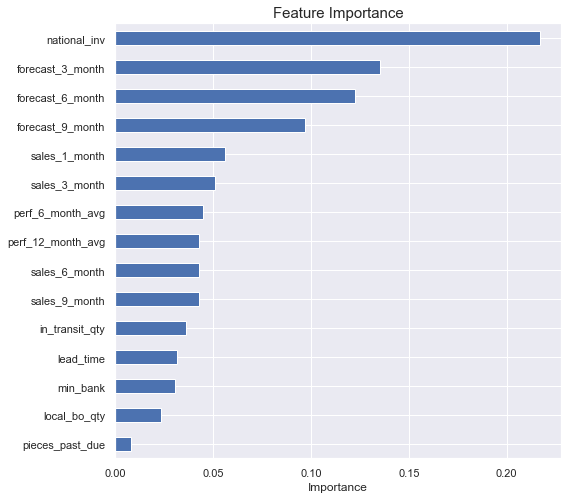

In [57]:
# Plot feature importance
feature_rank = pd.Series(rfc.feature_importances_, 
                         index=X_train.columns)

plt.figure(figsize=(8,8))
feature_rank.nlargest(15).sort_values(ascending = True).\
                                        plot(kind='barh')

plt.xlabel('Importance')
plt.title('Feature Importance', fontsize =15);